# Case Study #2 - Pizza Runner

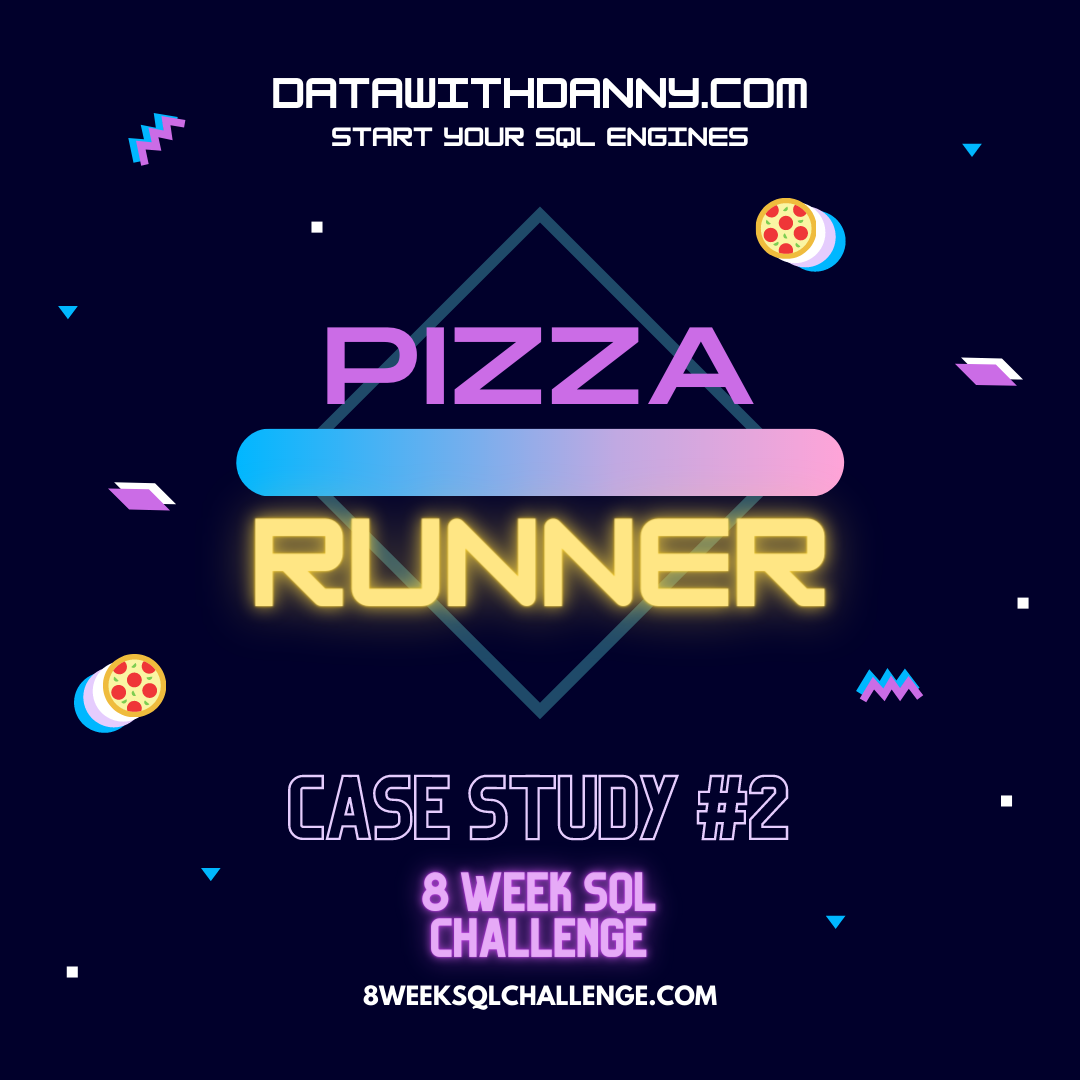

---

## Introduction

Did you know that over **115 million kilograms** of pizza is consumed daily worldwide??? (Well according to Wikipedia anyway…)

Danny was scrolling through his Instagram feed when something really caught his eye - “80s Retro Styling and Pizza Is The Future!”

Danny was sold on the idea, but he knew that pizza alone was not going to help him get seed funding to expand his new Pizza Empire - so he had one more genius idea to combine with it - he was going to ***Uberize*** it - and so Pizza Runner was launched!

Danny started by recruiting “runners” to deliver fresh pizza from Pizza Runner Headquarters (otherwise known as Danny’s house) and also maxed out his credit card to pay freelance developers to build a mobile app to accept orders from customers.

---

## Available Data

Because Danny had a few years of experience as a data scientist - he was very aware that data collection was going to be critical for his business’ growth.

He has prepared for us an entity relationship diagram of his database design but requires further assistance to clean his data and apply some basic calculations so he can better direct his runners and optimise Pizza Runner’s operations.

All datasets exist within the `pizza_runner` database schema - be sure to include this reference within your SQL scripts as you start exploring the data and answering the case study questions.

---

## Entity Relationship Diagram

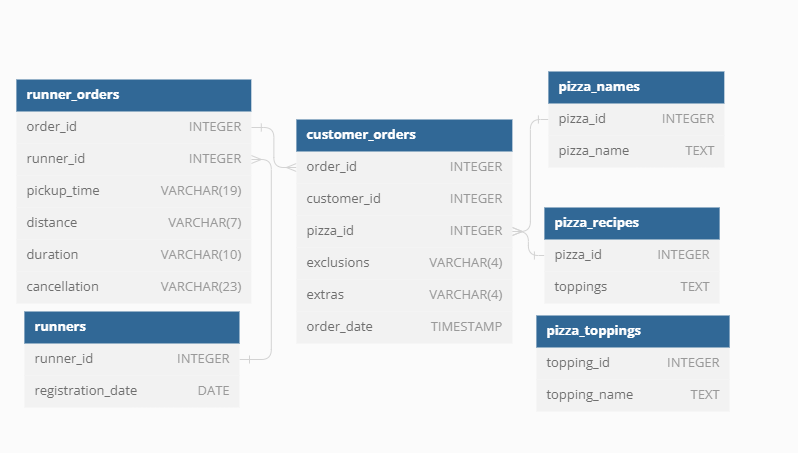

### Table 1: runners

The `runners` table shows the `registration_date` for each new runner

| runner_id | registration_date |
|-----------|---------------------|
| 1         | 2021-01-01          |
| 2         | 2021-01-03          |
| 3         | 2021-01-08          |
| 4         | 2021-01-15          |

### Table 2: customer_orders

Customer pizza orders are captured in the `customer_orders` table with 1 row for each individual pizza that is part of the order.

The `pizza_id` relates to the type of pizza which was ordered whilst the `exclusions` are the `ingredient_id` values which should be removed from the pizza and the `extras` are the `ingredient_id` values which need to be added to the pizza.

Note that customers can order multiple pizzas in a single order with varying `exclusions` and `extras` values even if the pizza is the same type!

The `exclusions` and `extras` columns will need to be cleaned up before using them in your queries.

| order_id | customer_id | pizza_id | exclusions | extras | order_time          |
|----------|-------------|----------|------------|--------|---------------------|
| 1        | 101         | 1        |            |        | 2021-01-01 18:05:02 |
| 2        | 101         | 1        |            |        | 2021-01-01 19:00:52 |
| 3        | 102         | 1        |            |        | 2021-01-02 23:51:23 |
| 3        | 102         | 2        | NaN        |        | 2021-01-02 23:51:23 |
| 4        | 103         | 1        | 4          |        | 2021-01-04 13:23:46 |
| 4        | 103         | 1        | 4          |        | 2021-01-04 13:23:46 |
| 4        | 103         | 2        | 4          |        | 2021-01-04 13:23:46 |
| 5        | 104         | 1        | null       | 1      | 2021-01-08 21:00:29 |
| 6        | 101         | 2        | null       | null   | 2021-01-08 21:03:13 |
| 7        | 105         | 2        | null       | 1      | 2021-01-08 21:20:29 |
| 8        | 102         | 1        | null       | null   | 2021-01-09 23:54:33 |
| 9        | 103         | 1        | 4          | 1, 5   | 2021-01-10 11:22:59 |
| 10       | 104         | 1        | null       | null   | 2021-01-11 18:34:49 |
| 10       | 104         | 1        | 2, 6       | 1, 4   | 2021-01-11 18:34:49 |

### Table 3: runner_orders

After each orders are received through the system - they are assigned to a runner - however not all orders are fully completed and can be cancelled by the restaurant or the customer.

The `pickup_time` is the timestamp at which the runner arrives at the Pizza Runner headquarters to pick up the freshly cooked pizzas. The `distance` and `duration` fields are related to how far and long the runner had to travel to deliver the order to the respective customer.

There are some known data issues with this table so be careful when using this in your queries - make sure to check the data types for each column in the schema SQL!

| order_id | runner_id | pickup_time          | distance | duration | cancellation           |
|----------|-----------|----------------------|----------|----------|-------------------------|
| 1        | 1         | 2021-01-01 18:15:34 | 20km     | 32 minutes |                         |
| 2        | 1         | 2021-01-01 19:10:54 | 20km     | 27 minutes |                         |
| 3        | 1         | 2021-01-03 00:12:37 | 13.4km   | 20 mins    | NaN                     |
| 4        | 2         | 2021-01-04 13:53:03 | 23.4     | 40        | NaN                     |
| 5        | 3         | 2021-01-08 21:10:57 | 10       | 15        | NaN                     |
| 6        | 3         | null                 | null     | null     | Restaurant Cancellation |
| 7        | 2         | 2020-01-08 21:30:45 | 25km     | 25mins    | null                    |
| 8        | 2         | 2020-01-10 00:15:02 | 23.4 km  | 15 minute | null                    |
| 9        | 2         | null                 | null     | null     | Customer Cancellation   |
| 10       | 1         | 2020-01-11 18:50:20 | 10km     | 10 minutes | null                    |

### Table 4: pizza_names

At the moment - Pizza Runner only has 2 pizzas available the Meat Lovers or Vegetarian!

| pizza_id | pizza_name   |
|----------|--------------|
| 1        | Meat Lovers  |
| 2        | Vegetarian   |

### Table 5: pizza_recipes

Each `pizza_id` has a standard set of `toppings` which are used as part of the pizza recipe.

| pizza_id | toppings                |
|----------|-------------------------|
| 1        | 1, 2, 3, 4, 5, 6, 8, 10 |
| 2        | 4, 6, 7, 9, 11, 12       |

### Table 6: pizza_toppings

This table contains all of the topping_name values with their corresponding topping_id value

| topping_id | topping_name |
|------------|--------------|
| 1          | Bacon        |
| 2          | BBQ Sauce    |
| 3          | Beef         |
| 4          | Cheese       |
| 5          | Chicken      |
| 6          | Mushrooms    |
| 7          | Onions       |
| 8          | Pepperoni    |
| 9          | Peppers      |
| 10         | Salami       |
| 11         | Tomatoes     |
| 12         | Tomato Sauce |

## Interactive SQL Session

The Dataset for this case study can be accessed from [here](https://www.db-fiddle.com/f/7VcQKQwsS3CTkGRFG7vu98/65). I will be using MySQL to solve this case study. In order to solve yourself this case study, simply go to the above link and choose MySQL Dialect (version > 8, if using MySQL version higher than 8 locally), copy & paste the Database schema into MySQL.

Here is the snapshot of it.

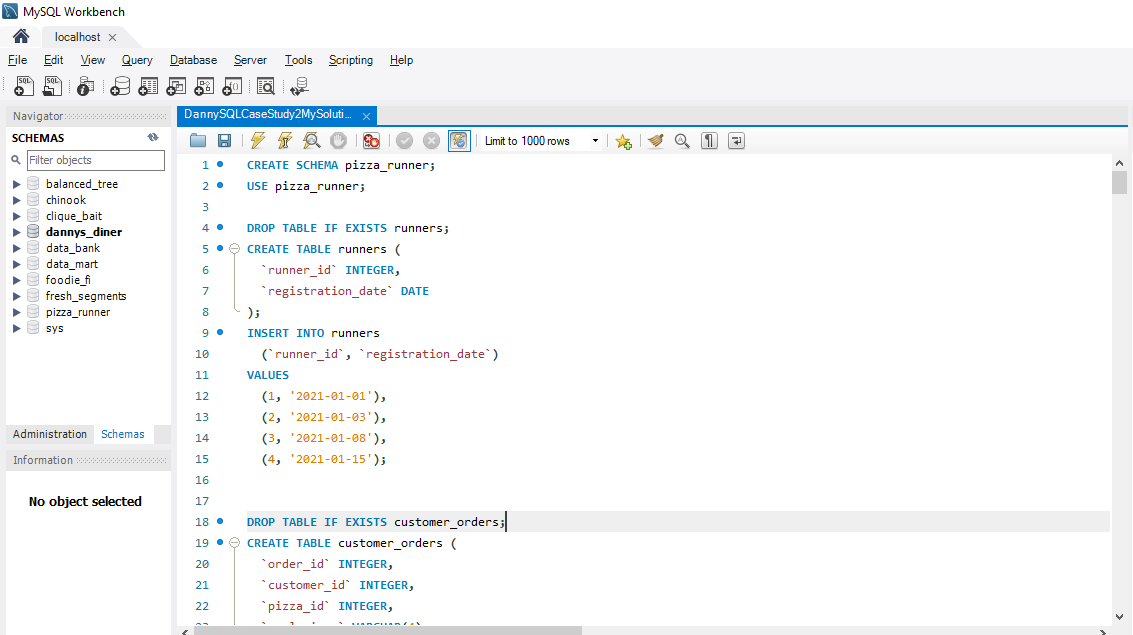

## Case Study Questions

This case study has **LOTS** of questions - they are broken up by area of focus including:

- **Pizza Metrics**
- **Runner and Customer Experience**
- **Ingredient Optimisation**
- **Pricing and Ratings**
- **Bonus DML Challenges (DML = Data Manipulation Language)**

Each of the following case study questions can be answered using a single SQL statement.

Again, there are many questions in this case study - please feel free to pick and choose which ones you’d like to try!

Before you start writing your SQL queries however - you might want to investigate the data, you may want to do something with some of those `null` values and data types in the `customer_orders` and `runner_orders` tables!

### A. Pizza Metrics

1) How many pizzas were ordered?

2) How many unique customer orders were made?

3) How many successful orders were delivered by each runner?

4) How many of each type of pizza was delivered?

5) How many Vegetarian and Meatlovers were ordered by each customer?

6) What was the maximum number of pizzas delivered in a single order?

7) For each customer, how many delivered pizzas had at least 1 change and how many had no changes?

8) How many pizzas were delivered that had both exclusions and extras?

9) What was the total volume of pizzas ordered for each hour of the day?

10) What was the volume of orders for each day of the week?

### B. Runner and Customer Experience

1) How many runners signed up for each 1 week period? (i.e. week starts `2021-01-01`).

2) What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?

3) Is there any relationship between the number of pizzas and how long the order takes to prepare?

4) What was the average distance travelled for each customer?

5) What was the difference between the longest and shortest delivery times for all orders?

6) What was the average speed for each runner for each delivery and do you notice any trend for these values?

7) What is the successful delivery percentage for each runner?


### C. Ingredient Optimisation

1) What are the standard ingredients for each pizza?

2) What was the most commonly added extra?

3) What was the most common exclusion?

4) Generate an order item for each record in the `customers_orders` table in the format of one of the following:
    - `Meat Lovers`
    - `Meat Lovers - Exclude Beef`
    - `Meat Lovers - Extra Bacon`
    - `Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers`
    
5) Generate an alphabetically ordered comma separated ingredient list for each pizza order from the `customer_orders` table and add a 2x in front of any relevant ingredients
    - `For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"`.
    
6) What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?

### D. Pricing and Ratings

1) If a Meat Lovers pizza costs \\$12 and Vegetarian costs \\$10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?

2) What if there was an additional \\$1 charge for any pizza extras?
    - Add cheese is \\$1 extra
    
3) The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.

4) Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?

    - `customer_id`
    - `order_id`
    - `runner_id`
    - `rating`
    - `order_time`
    - `pickup_time`
    - `Time between order and pickup`
    - `Delivery duration`
    - `Average speed`
    - `Total number of pizzas`

5) If a Meat Lovers pizza was \\$12 and Vegetarian \\$10 fixed prices with no cost for extras and each runner is paid \$0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?

### E. Bonus Questions

If Danny wants to expand his range of pizzas - how would this impact the existing data design? Write an `INSERT` statement to demonstrate what would happen if a new `Supreme` pizza with all the toppings was added to the Pizza Runner menu?

## Let's start solving them.
### Performing the Data Cleaning/ Transformations first!

**Cleaning the Customer_Orders table**

**`Explanation`**:

***The provided SQL script is focused on cleaning and transforming the `customer_orders` table in the `pizza_runner` database. The script involves creating a temporary table named `customer_orders_temp` with specific modifications to handle cases where certain columns may have null or 'null' values.***

**1) Cleaning Customer_Orders Table:**
    
    -- Cleaning Customer_Orders Table
    USE pizza_runner;

    -- Drop the temporary table if it exists
    DROP TABLE IF EXISTS customer_orders_temp;

    -- Create a temporary table with cleaned data
    CREATE TEMPORARY TABLE customer_orders_temp AS
    SELECT 
        order_id,
        customer_id,
        pizza_id,
        CASE WHEN exclusions IS NULL OR exclusions LIKE 'null' THEN ''
            ELSE exclusions END AS exclusions,
        CASE WHEN extras IS NULL OR extras LIKE 'null' THEN ''
            ELSE extras END AS extras,
        order_time
    FROM customer_orders;

**`Step-by-Step Explanation:`**

**1) Database Selection:**
    
    - `USE pizza_runner`: Specifies the `pizza_runner` database for subsequent operations.
    
**2) Drop Existing Temporary Table:**
    
    - `DROP TABLE IF EXISTS customer_orders_temp`: Drops the temporary table `customer_orders_temp` if it already exists. This ensures a clean slate for creating the table.

**3) Temporary Table Creation:**

    - `CREATE TEMPORARY TABLE customer_orders_temp AS`: Initiates the creation of a new temporary table named `customer_orders_temp`
    
**4) Data Transformation with CASE Statements:**

    - `CASE WHEN exclusions IS NULL OR exclusions LIKE 'null' THEN '' ELSE exclusions END AS exclusions`: Replaces null or 'null' values in the `exclusions` column with an empty string.
    - `CASE WHEN extras IS NULL OR extras LIKE 'null' THEN '' ELSE extras END AS extras`: Replaces null or 'null' values in the `extras column with an empty string.

**5) Column Selection:**

    - `SELECT order_id, customer_id, pizza_id, exclusions, extras, order_time FROM customer_orders_temp`: Selects specific columns from the customer_orders_temp table.
    
**`Final Concise Explanation`**:
This script is useful for cleaning up potential inconsistencies or issues in the `customer_orders` table related to the `exclusions` and `extras` columns, making the data more consistent and ready for further analysis. The use of a temporary table helps avoid permanent changes to the original data.

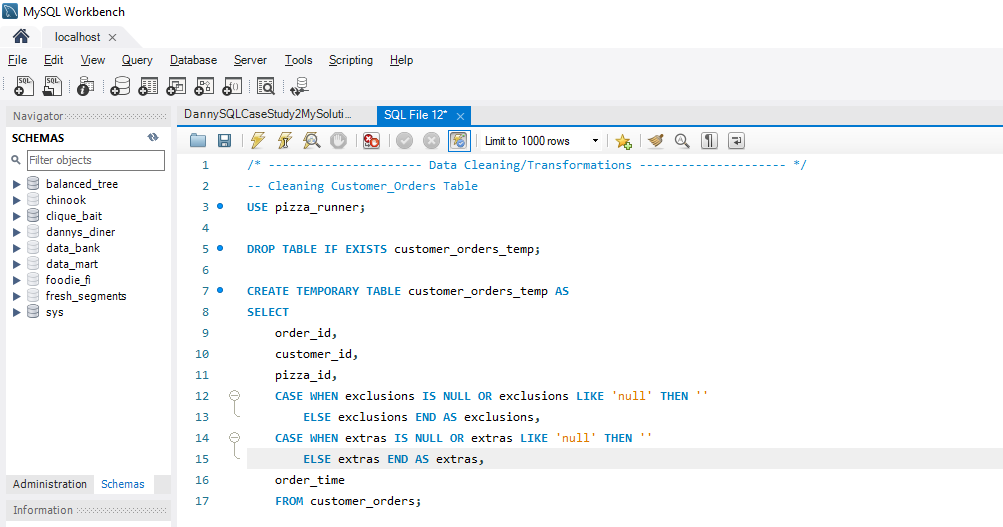

The output of the above query looks like:

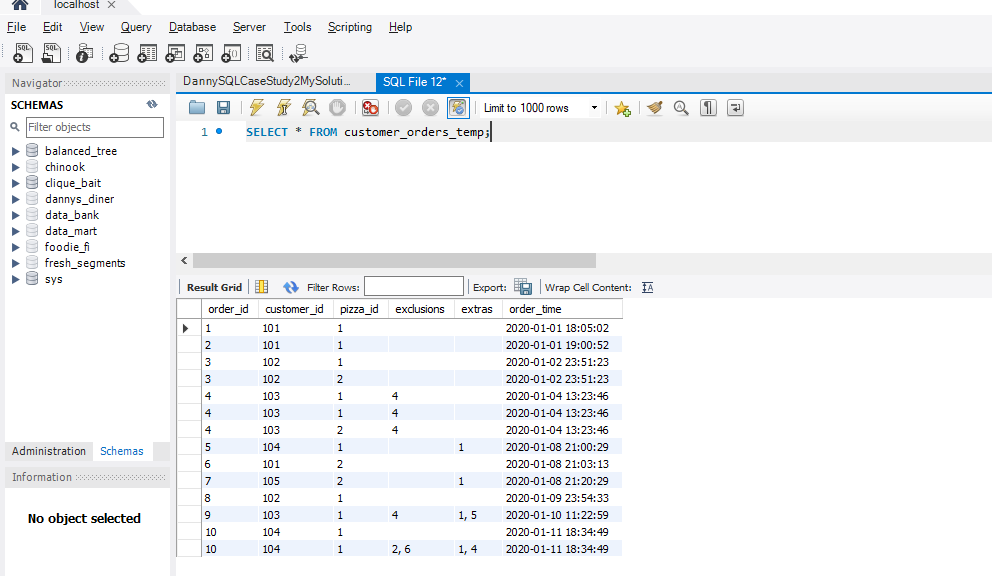

**Cleaning the Runner_Orders table**

**`Explanation`**:

***The provided SQL script is focused on cleaning and transforming the `runner_orders` table in the `pizza_runner` database. The script involves creating a temporary table named `runner_orders_temp` with specific modifications to handle cases where certain columns may have 'null' or inconsistent values.***

**1) Cleaning Runner_Orders Table:**
    
    -- Cleaning Runner_Orders Table
    DROP TABLE IF EXISTS runner_orders_temp;

    CREATE TEMPORARY TABLE runner_orders_temp AS
    SELECT 
        order_id,
        runner_id,
        CAST(CASE WHEN pickup_time LIKE "null" THEN NULL ELSE pickup_time END AS DATETIME) AS pickup_time,
        CAST(CASE WHEN distance LIKE "null" THEN NULL WHEN distance LIKE '%km' THEN TRIM('km' FROM distance)
            ELSE distance END AS FLOAT) AS distance,
        CAST(CASE WHEN duration LIKE "null" THEN NULL
            WHEN duration LIKE '%minutes' THEN TRIM('minutes' FROM duration)
            WHEN duration LIKE '%minute' THEN TRIM('minute' FROM duration)
            WHEN duration LIKE '%mins' THEN TRIM('mins' FROM duration)
            ELSE duration END AS FLOAT) AS duration,
        CASE WHEN cancellation IN ('', 'null', 'NaN') THEN NULL
            ELSE cancellation END AS cancellation
        FROM runner_orders;

**`Step-by-Step Explanation:`**

**1) Drop Existing Temporary Table:**
    
    - DROP TABLE IF EXISTS runner_orders_temp: Drops the temporary table `runner_orders_temp` if it already exists. This ensures a clean slate for creating the table.

**2) Temporary Table Creation:**

    - CREATE TEMPORARY TABLE runner_orders_temp AS: Initiates the creation of a new temporary table named `runner_orders_temp`
    
**3) Data Transformation with CASE Statements:**

    - CAST(CASE WHEN pickup_time LIKE "null" THEN NULL ELSE pickup_time END AS DATETIME) AS pickup_time: Converts the pickup_time column to a DATETIME type, handling cases where the value is 'null'.
    - CAST(CASE WHEN distance LIKE "null" THEN NULL WHEN distance LIKE '%km' THEN TRIM('km' FROM distance) ELSE distance END AS FLOAT) AS distance: Converts the distance column to FLOAT, handling cases where the value is 'null' or includes 'km'.
    - CAST(CASE WHEN duration LIKE "null" THEN NULL WHEN duration LIKE '%minutes' THEN TRIM('minutes' FROM duration) WHEN duration LIKE '%minute' THEN TRIM('minute' FROM duration) WHEN duration LIKE '%mins' THEN TRIM('mins' FROM duration) ELSE duration END AS FLOAT) AS duration: Converts the duration column to FLOAT, handling cases where the value is 'null' or includes various forms of minutes.

**4) Handling Cancellation Values:**

    - CASE WHEN cancellation IN ('', 'null', 'NaN') THEN NULL ELSE cancellation END AS cancellation: Replaces empty, 'null', or 'NaN' values in the cancellation column with NULL.
    
**5) Column Selection:**

    - SELECT order_id, runner_id, pickup_time, distance, duration, cancellation FROM runner_orders_temp: Selects specific columns from the runner_orders_temp table.
    
**`Final Concise Explanation`**:
This script aims to handle inconsistencies and 'null' values in the `runner_orders` table, making the data more consistent and suitable for further analysis. The use of a temporary table ensures that the original data remains unchanged.

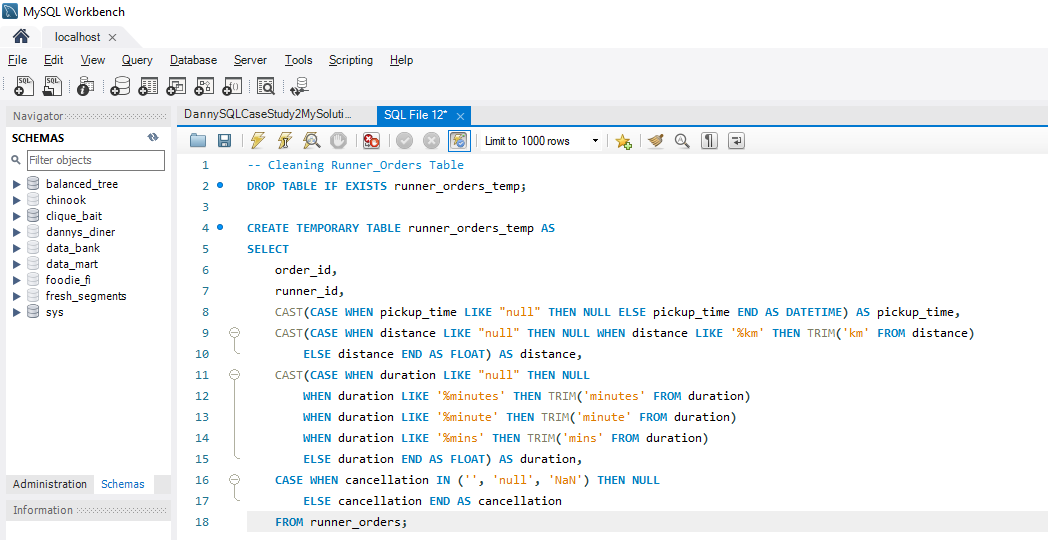

The output of the above query looks like:

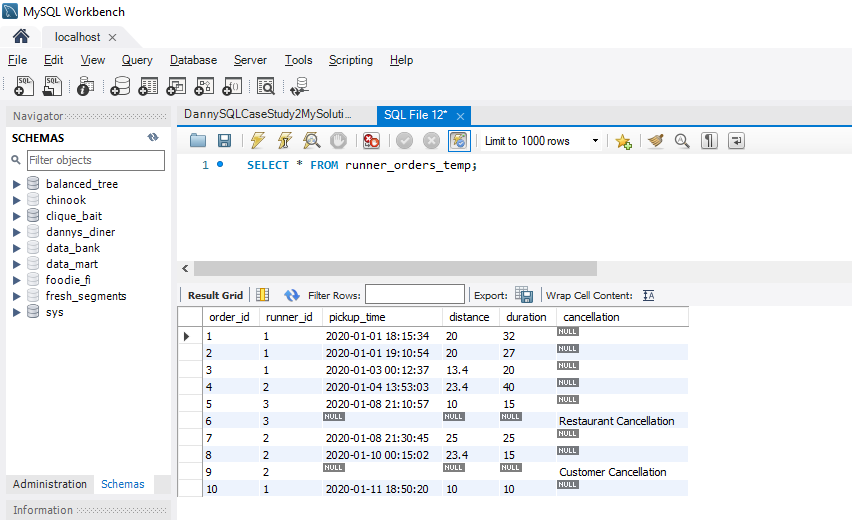

**Changing the Data Types of columns in runner_orders TABLE**

**`Explanation`**:
This query modifies the data types in the runner_orders_temp table:

- `pickup_time` is changed to a DATETIME type for date and time values.
- `distance` and `duration` are changed to FLOAT types for decimal number representation.

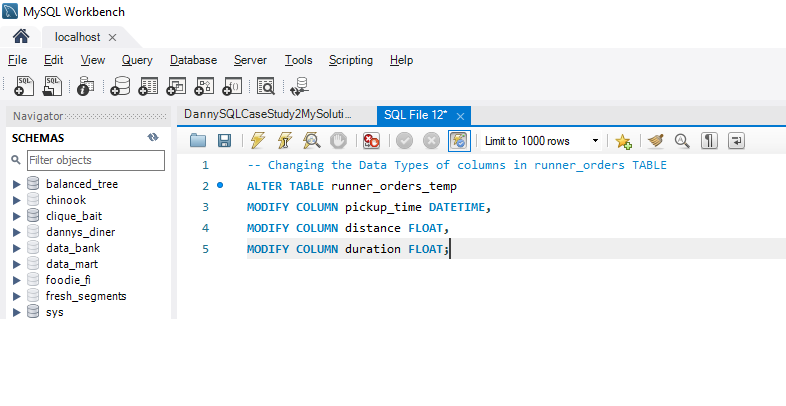

### A. Pizza Metrics
- **1. How many pizzas were ordered?**

**`Explanation`**:
The provided SQL query is aimed at calculating the total number of pizzas that were ordered.

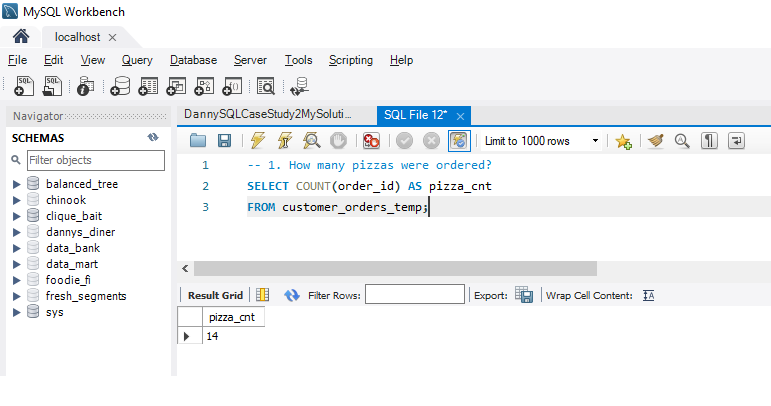

- **2. How many unique customer orders were made?**

**`Explnation`**:
This query provides insight into the number of distinct customer orders, offering a measure of the variety and uniqueness of orders within the dataset. The use of `DISTINCT` ensures that each `order_id` is counted only once in the calculation.

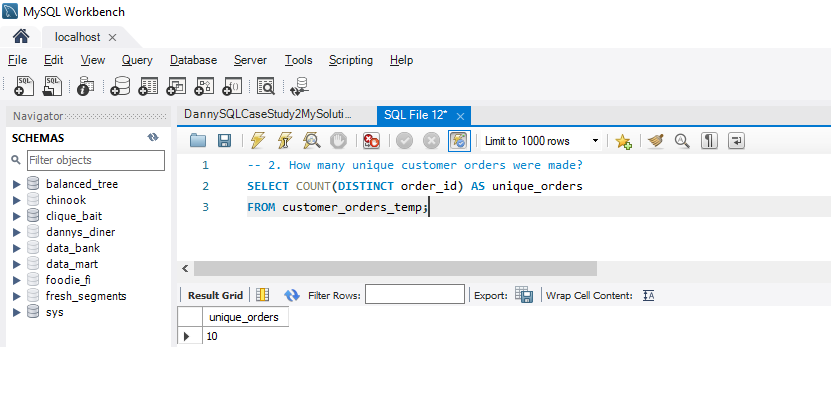

- **3. How many successful orders were delivered by each runner?**

**`Explanation`**:
The provided SQL query is intended to determine the number of successful orders delivered by each runner. The query produces a list of `runner_id` values along with the count of successful deliveries for each runner, where successful deliveries are identified by a non-zero distance.

This information provides insights into the performance of each runner in terms of successfully delivering orders.

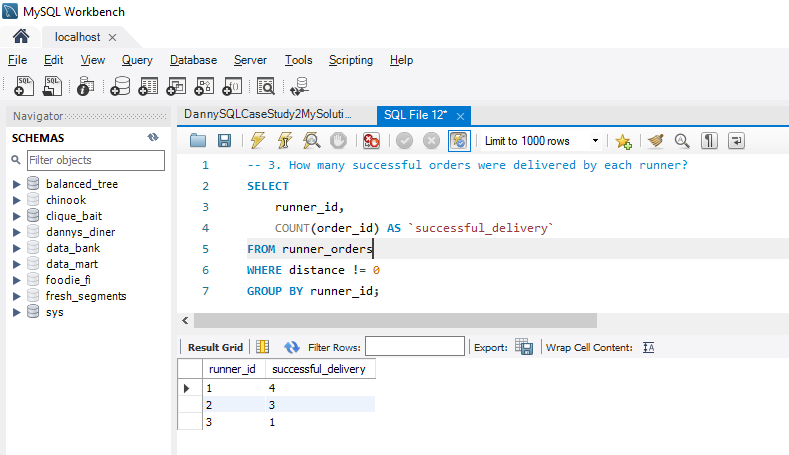

- **4. How many of each type of pizza was delivered?**

**`Explnation`**:
The provided SQL query is intended to determine the number of each type of pizza that was delivered.The query produces a list of pizza_name values along with the count of successful deliveries for each type of pizza, where successful deliveries are identified by a non-zero distance.

This information provides insights into the popularity or demand for each type of pizza among delivered orders.

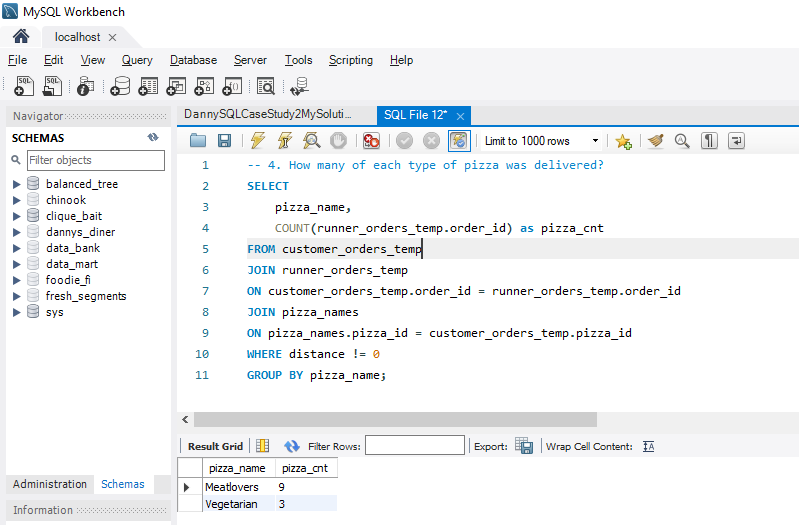

- **5. How many Vegetarian and Meatlovers were ordered by each customer?**

**`Explanation`**:
The provided SQL query is intended to determine the count of Vegetarian and Meatlovers pizzas ordered by each customer. 

The query produces a list of `customer_id`, `pizza_name`, and the count of orders (`order_cnt`) for each combination of customer and pizza type. This information provides insights into the ordering preferences of each customer, specifically regarding the number of Vegetarian and Meatlovers pizzas ordered.

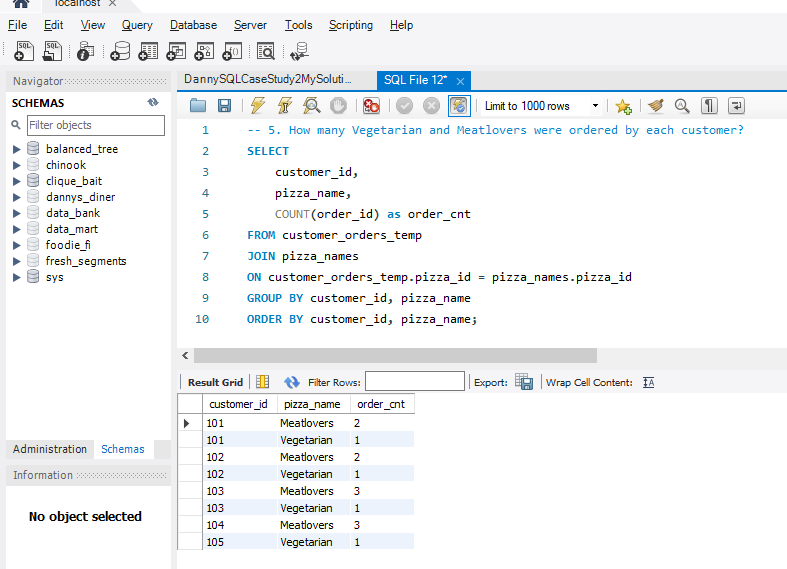

- **6. What was the maximum number of pizzas delivered in a single order?**

**`Explanation`**:
The provided SQL query aims to determine the maximum number of pizzas delivered in a single order. 

The query produces a list of `order_id` and the count of pizzas (`pizza_cnt`) for each order. The results are ordered in descending order of pizza count, allowing you to identify the order with the maximum number of pizzas delivered.

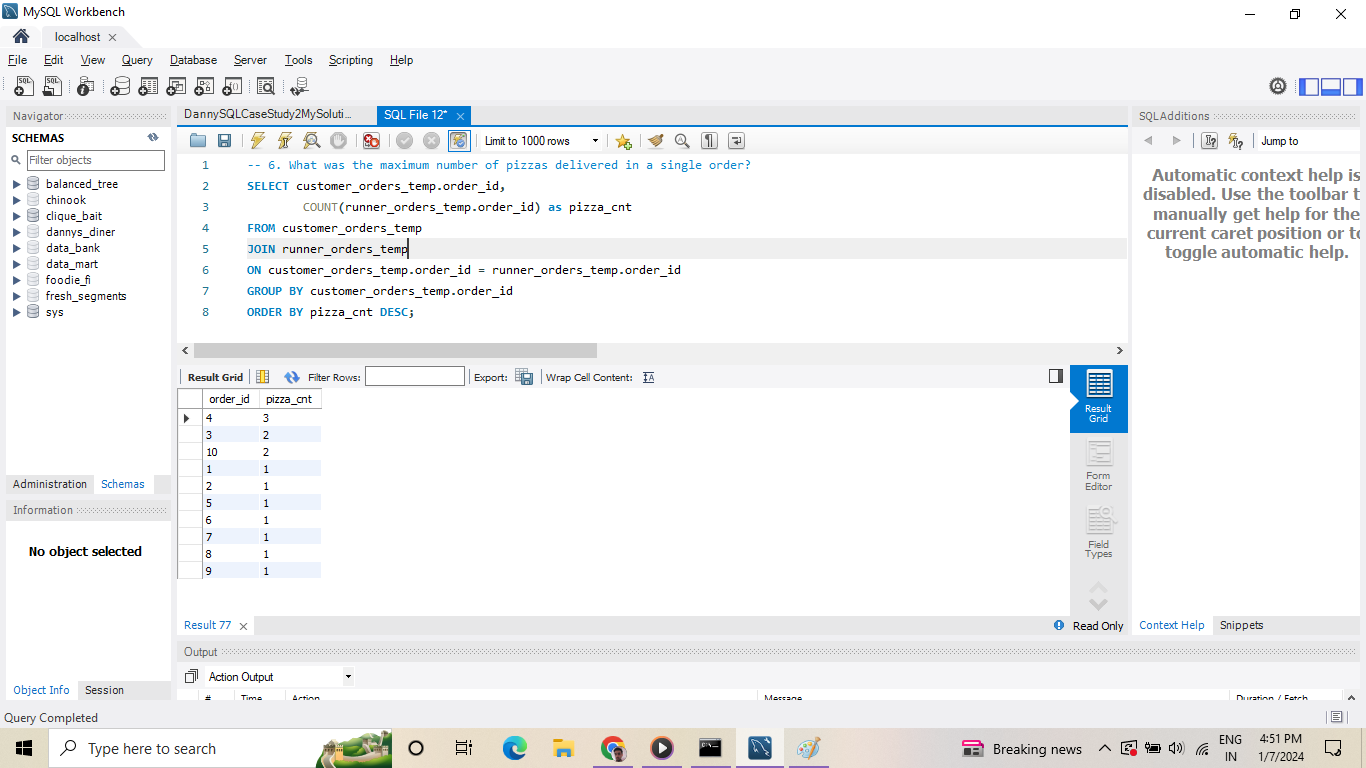

- **7. For each customer, how many delivered pizzas had at least 1 change and how many had no changes?**

**`Explanation`**:
The given query is analyzing customer orders, specifically focusing on delivered pizzas, to understand how many pizzas for each customer had at least one change (exclusions or extras) and how many had no changes.

This query helps identify customer preferences for customized pizzas. Customers with higher counts in the 'Change' column may prefer pizzas with modifications, while those with higher counts in the 'No_Change' column prefer pizzas without any changes.
It offers insights into the distribution of delivered pizzas based on customization preferences among customers.

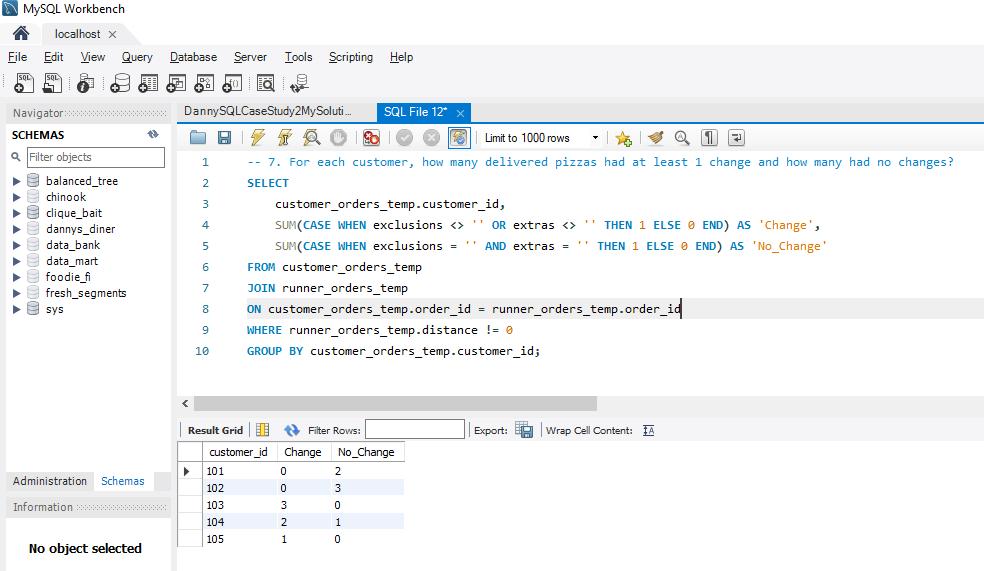

- **8. How many pizzas were delivered that had both exclusions and extras?**

**`Explanation`**:
This query analyzes delivered pizzas to find out how many had both exclusions and extras.

The query provides insights into the number of delivered pizzas for each customer that had both exclusions and extras. It helps understand how often customers choose to customize their pizzas with both exclusions and extras in a single order.

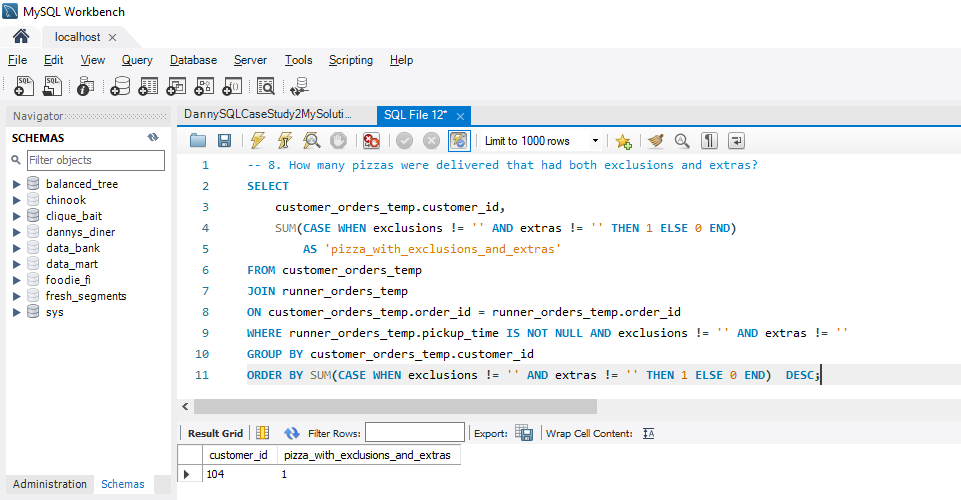

- **9. What was the total volume of pizzas ordered for each hour of the day?**

**`Explanation`**:
The query provides insights into the total volume of pizzas ordered for each hour of the day. It helps identify peak hours of pizza orders, allowing businesses to optimize staffing and resources accordingly.

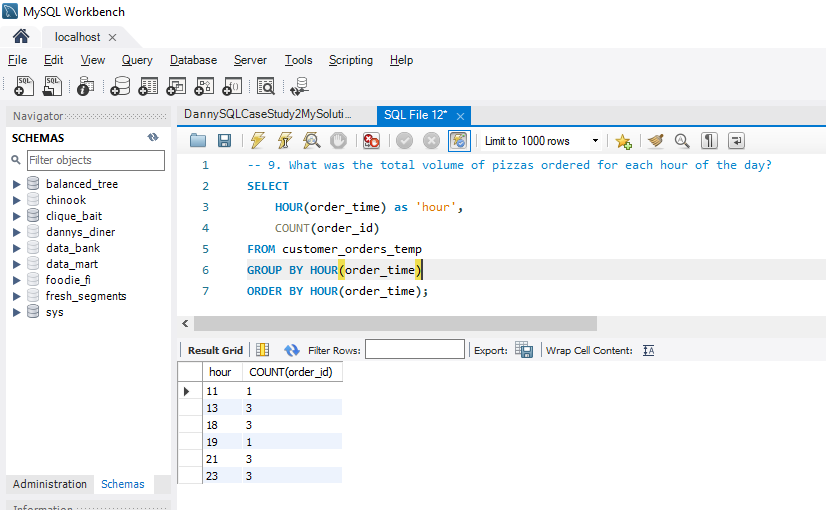

- **10. What was the volume of orders for each day of the week?**

**`Explanation`**:
The query provides insights into the volume of orders for each day of the week. It helps identify trends and patterns in customer ordering behavior throughout the week, aiding businesses in adjusting operations and promotions accordingly.

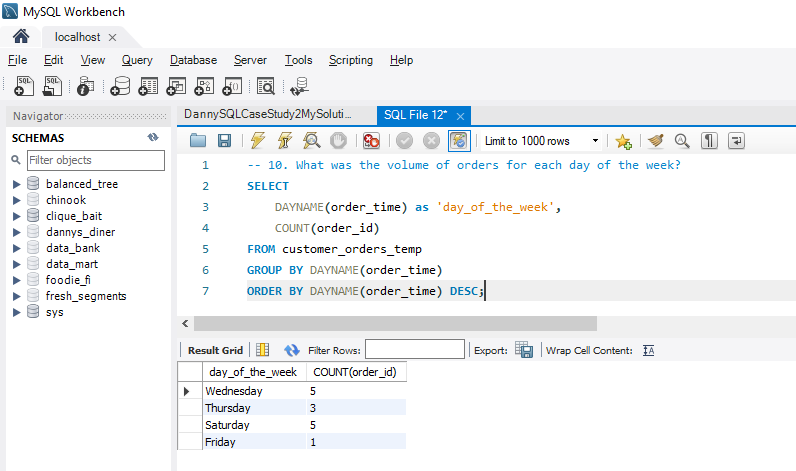

### B. Runner and Customer Experience

- **1. How many runners signed up for each 1 week period? (i.e. week starts `2021-01-01`).**

**`Explanation`**:
The query provides insights into the number of runners who signed up for each one-week period. This information can be useful for understanding the trends in runner sign-ups over time and evaluating the effectiveness of marketing or recruitment efforts.

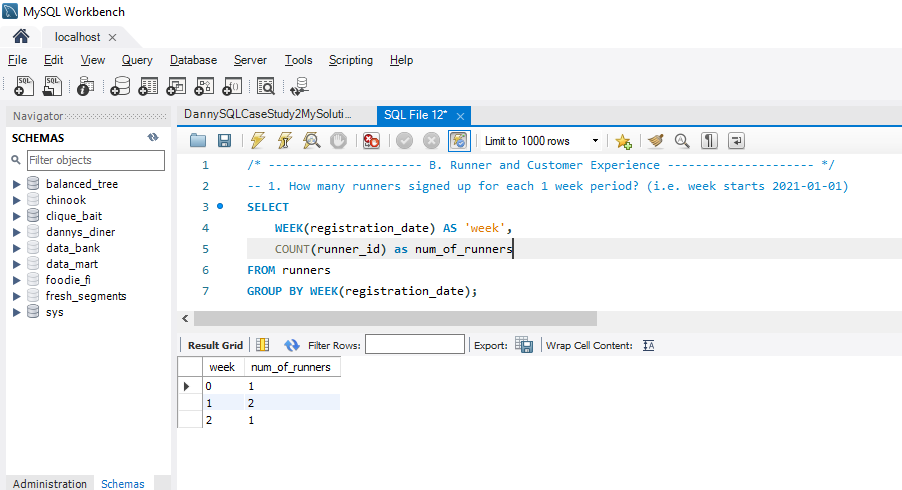

- **2. What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?**

**`Explanation`**:
***This query calculates the average time in minutes it took for each runner to arrive at Pizza Runner HQ to pick up the order. Here's a step-by-step explanation:***

**1) Creation of Temporary Table (Common Table Expression - CTE):**
    
    - WITH runners_pick_cte AS (...): Defines a CTE named runners_pick_cte to calculate the average pickup time for each runner.
    - Subquery inside CTE:
        - SELECT runner_id, ROUND(AVG(TIMESTAMPDIFF(MINUTE, order_time, pickup_time)),2) AS avg_time: Calculates the average time difference in minutes between the order_time and pickup_time for each runner.
        - FROM runner_orders_temp JOIN customer_orders_temp ON ...: Joins the runner_orders_temp and customer_orders_temp tables based on the order ID to get relevant information.
        - WHERE runner_orders_temp.distance != 0: Filters out cases where the distance is 0, ensuring only successful deliveries are considered.
        - GROUP BY runner_id: Groups the results by runner_id.
        
**2) Main Query:**

    - SELECT ROUND(AVG(avg_time),0) AS avg_pick_time FROM runners_pick_cte: Calculates the overall average pickup time by rounding the average pickup times from the CTE to the nearest whole number.

**`Final Concise Explanation`**:
The query provides insights into the average time it took for each runner to arrive at Pizza Runner HQ for order pickups. The result is the overall average pickup time rounded to the nearest whole number. This information can be valuable for evaluating the efficiency of runners in fulfilling orders.

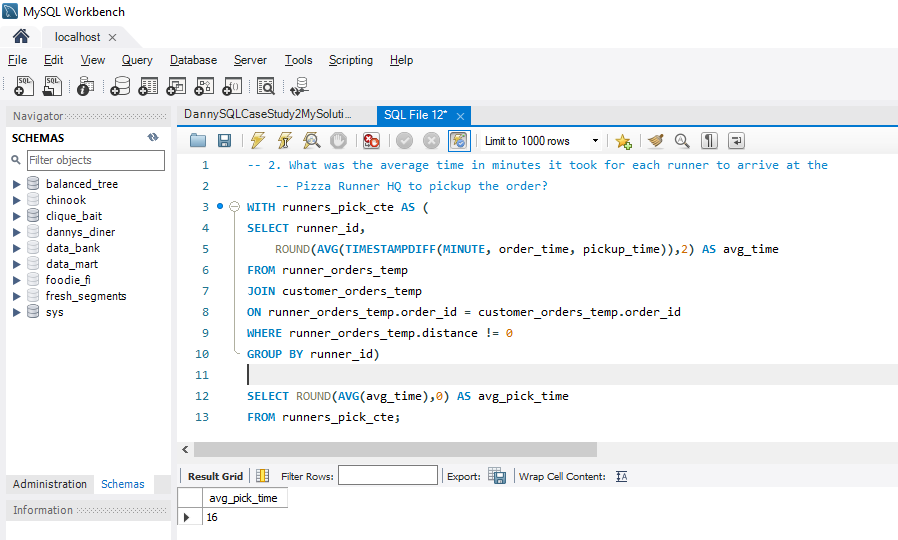

- **3. Is there any relationship between the number of pizzas and how long the order takes to prepare?**

**`Explanation`**:
***This query aims to investigate the relationship between the number of pizzas in an order and the time it takes to prepare that order.***

**1) Creation of Temporary Table (Common Table Expression - CTE):**
    
    - WITH order_count_cte AS (...): Defines a CTE named order_count_cte to calculate the count of pizzas in each order (pizza_order_count) and the average time to prepare each order (avg_time_to_prepare).
    - Subquery inside CTE:
        - SELECT customer_orders_temp.order_id, COUNT(customer_orders_temp.order_id) AS pizza_order_count, ...: Counts the number of pizzas in each order and calculates the average time to prepare each order.
        - FROM runner_orders_temp JOIN customer_orders_temp ON ...: Joins the runner_orders_temp and customer_orders_temp tables based on the order ID to get relevant information.
        - WHERE pickup_time IS NOT NULL: Filters out cases where the pickup time is not available, ensuring only successfully delivered orders are considered.
        - GROUP BY customer_orders_temp.order_id: Groups the results by order ID.
        
**2) Main Query:**

    - SELECT pizza_order_count, ROUND(AVG(avg_time_to_prepare),2) AS avg_time_to_prepare FROM order_count_cte GROUP BY pizza_order_count;: Calculates the average time to prepare orders for each count of pizzas (pizza_order_count).

**`Final Concise Explanation`**:
The query helps explore whether there is any correlation between the number of pizzas in an order and the time it takes to prepare that order. The result provides insights into the average preparation time based on the count of pizzas in the order. Analyzing this information can be valuable for understanding the efficiency of order preparation processes based on the order size.

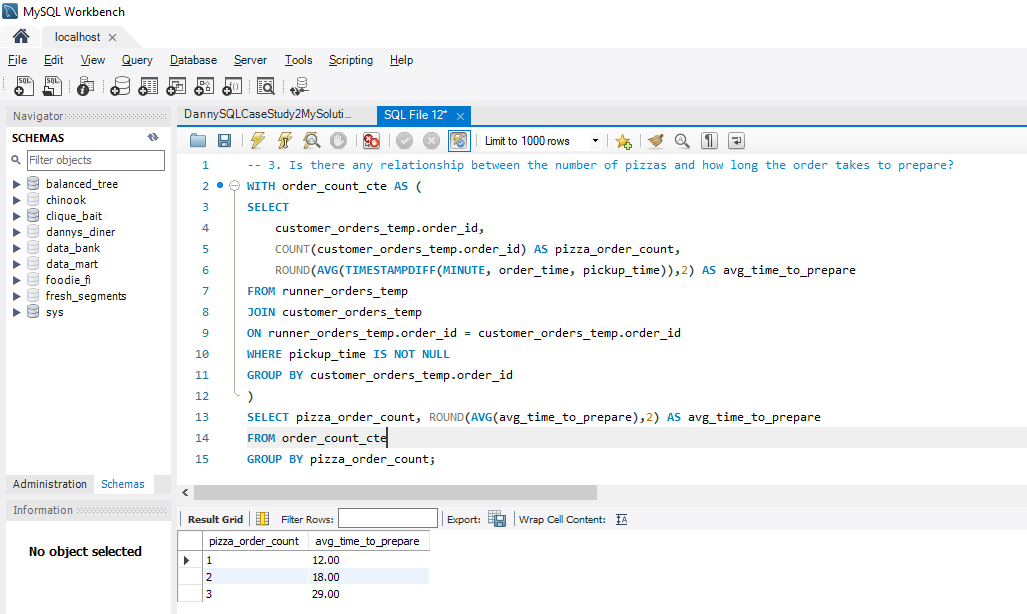

- **4. What was the average distance travelled for each customer?**

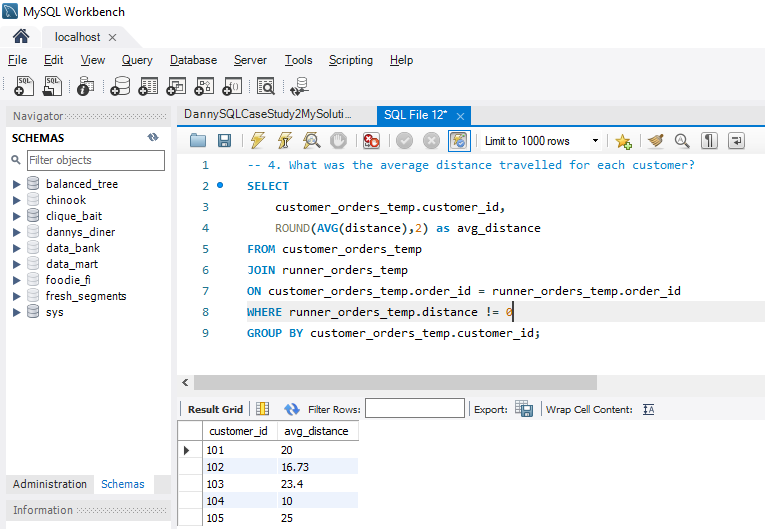

- **5. What was the difference between the longest and shortest delivery times for all orders?**

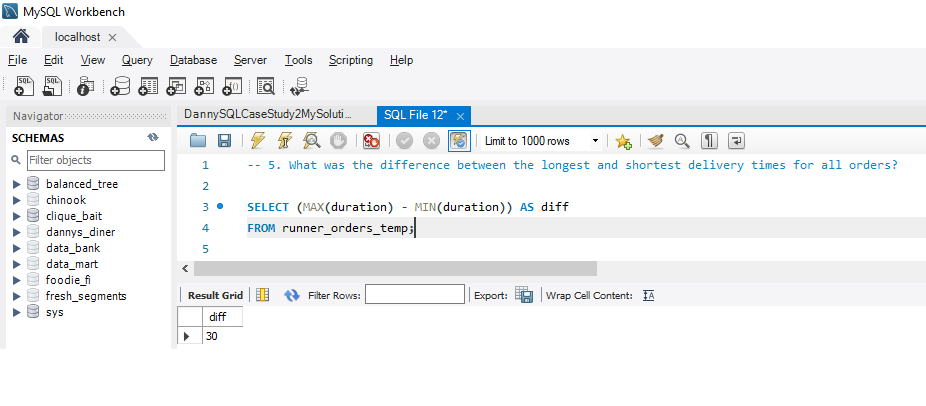

- **6. What was the average speed for each runner for each delivery and do you notice any trend for these values?**

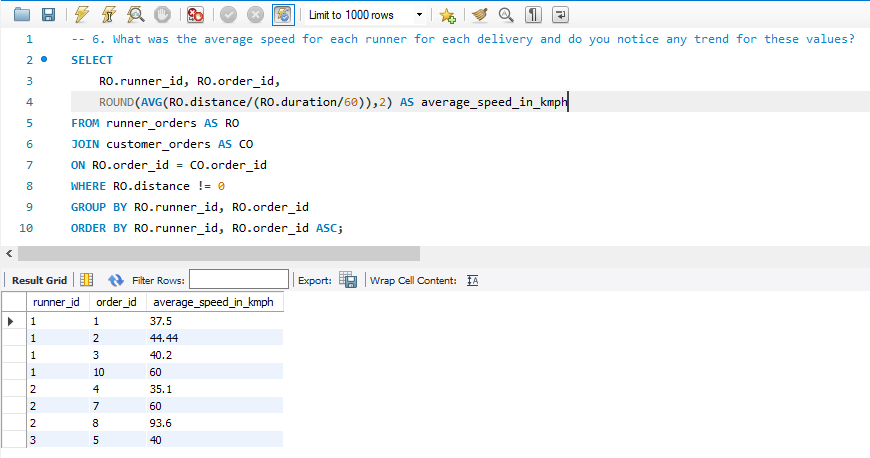

- **7. What is the successful delivery percentage for each runner?**

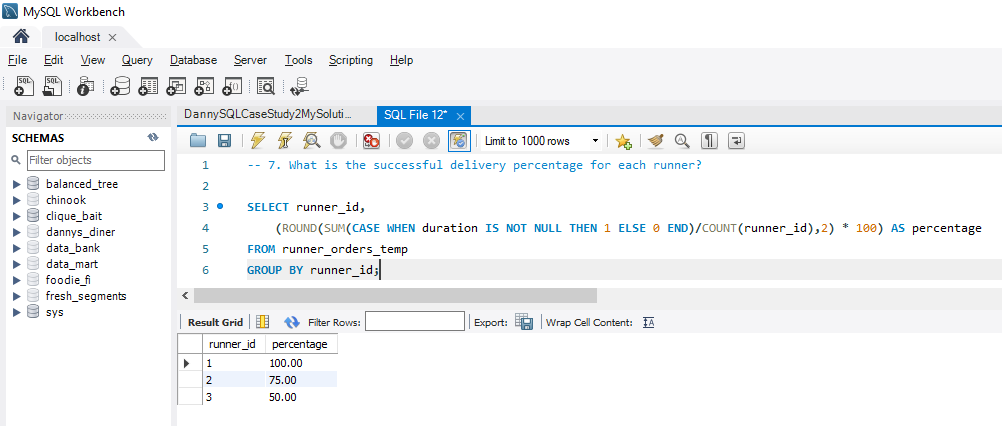

### C. Ingredient Optimisation

**`Explanation`**:

***This query is performing data cleaning on the `pizza_recipes` table and creating a temporary table `pizza_recipes_temp`. It's extracting individual topping IDs for each pizza from the comma-separated `toppings` column using the `SUBSTRING_INDEX` function. Let's break down the steps:***

**1) Subquery to Generate Numbers:**
    
    - Subquery to Generate Numbers
      SELECT 1 AS n
      UNION SELECT 2
      UNION SELECT 3
      UNION SELECT 4
      UNION SELECT 5
      UNION SELECT 6
      UNION SELECT 7
      UNION SELECT 8
      UNION SELECT 9
      UNION SELECT 10;

This subquery generates numbers from 1 to 10. The UNION operator is used to combine the results into a single column.

**2) JOIN with pizza_recipes:**

    - Joining with pizza_recipes to Extract Toppings
      SELECT
          pizza_id,
          SUBSTRING_INDEX(SUBSTRING_INDEX(toppings, ',', n), ',', -1) AS topping_id
      FROM
          pizza_recipes
      JOIN (
          -- Subquery with Numbers
          SELECT 1 AS n
          UNION SELECT 2
          UNION SELECT 3
          UNION SELECT 4
          UNION SELECT 5
          UNION SELECT 6
          UNION SELECT 7
          UNION SELECT 8
          UNION SELECT 9
          UNION SELECT 10
       ) AS numbers ON CHAR_LENGTH(toppings) - CHAR_LENGTH(REPLACE(toppings, ',', '')) >= n - 1
        ORDER BY
          pizza_id;

Here, we are joining the `pizza_recipes` table with the subquery (`numbers`). The `SUBSTRING_INDEX` function is used to extract individual toppings based on the generated numbers.
    
**3) Create Temporary Table:**

    - CREATE TEMPORARY TABLE pizza_recipes_temp AS 

Finally, we use the results from the previous query to create a temporary table named `pizza_recipes_temp`.

**`Final Concise Explanation`**:
The goal is to break down the toppings of each pizza in the original pizza_recipes table into individual rows, associating each row with the corresponding pizza ID.

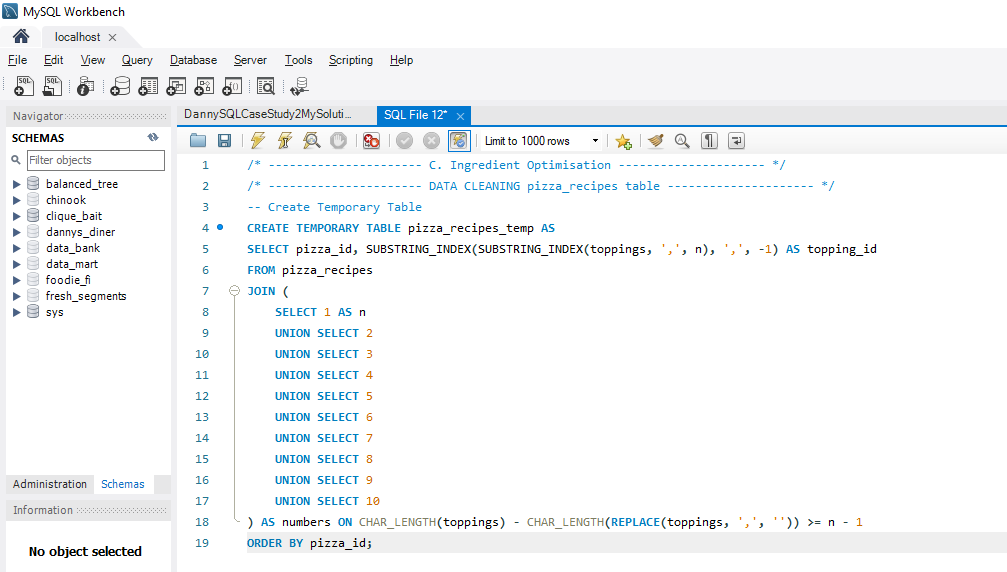

The output of the above query is shown as below:

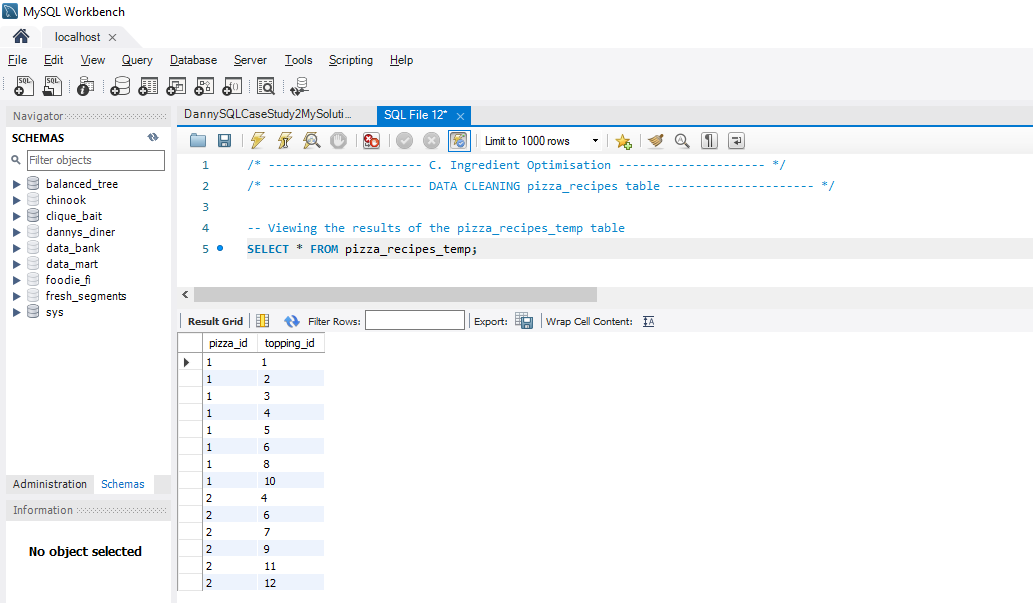

**`Explanation`**:

***This SQL script is designed to break down a column called `extras` in the `customer_orders_temp` table into individual values and create a new table named `extrasBreak_` to store these values. The process involves creating a temporary table (`extrasBreak`) to handle the extraction and transformation of the `extras` column..***

Here's a step-by-step breakdown of the query:

**1) Dropping Existing Table (if exists):**
    
    - DROP TABLE IF EXISTS extrasBreak: This command drops the extrasBreak table if it already exists.
    
**2) Creating Temporary Table (`extrasBreak`):**
    
    - CREATE TEMPORARY TABLE extrasBreak AS
      SELECT record_id, TRIM(value) AS extra_id
      FROM (
          SELECT record_id,
               TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(extras, ',', n.digit + 1), ',', -1)) AS value
          FROM customer_orders_temp
          LEFT JOIN (
               SELECT 0 AS digit UNION ALL SELECT 1 UNION ALL SELECT 2 UNION ALL SELECT 3 UNION ALL SELECT 4
          ) n ON CHAR_LENGTH(extras) - CHAR_LENGTH(REPLACE(extras, ',', '')) >= n.digit
          WHERE TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(extras, ',', n.digit + 1), ',', -1)) <> ''
       ) AS e;
     - This query uses a set of nested functions to split the comma-separated values in the extras column (extrasBreak table creation). The SUBSTRING_INDEX function is employed to extract individual values based on commas. The temporary table is created with columns record_id and extra_id, where extra_id contains the extracted and trimmed values.

**3) Inserting Rows with Null or Empty Values:**

    - INSERT INTO extrasBreak (record_id, extra_id)
      SELECT record_id, NULL AS extra_id
      FROM customer_orders_temp
      WHERE extras IS NULL OR TRIM(extras) = '';

**4) Creating the Final Result Table (`extrasBreak_`):**
    
    - CREATE TABLE extrasBreak_ AS
      SELECT record_id,
        CASE WHEN extra_id IS NULL THEN '' ELSE extra_id END AS extra_id
      FROM extrasBreak
      ORDER BY record_id, extra_id;

**`Final Concise Explanation`**:
In summary, this script transforms a comma-separated extras column in the customer_orders_temp table into individual values and creates a new table (extrasBreak_) for further analysis or usage.

Unpivoting/breaking down the `extra_id` for later use into `extrasBreak_` temporary table. 

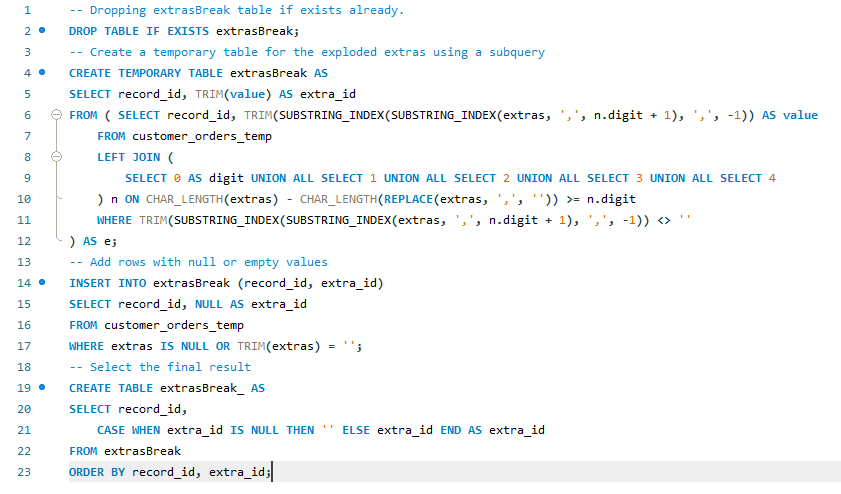

The output of the above query is as follows:

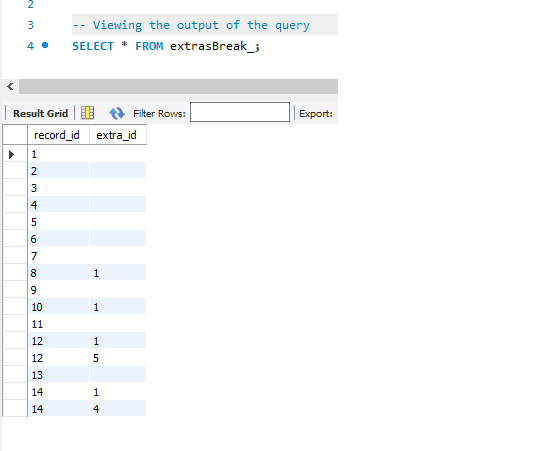

**`Explanation`**:

***This SQL script is designed to break down a column called `exclusions` in the `customer_orders_temp` table into individual values and create a new table named `exclusionsBreak_` to store these values. The process involves creating a temporary table (`exclusionsBreak`) to handle the exclusionction and transformation of the `exclusions` column..***

Here's a step-by-step breakdown of the query:

**1) Dropping Existing Table (if exists):**
    
    - DROP TABLE IF EXISTS exclusionsBreak: This command drops the exclusionsBreak table if it already exists.
    
**2) Creating Temporary Table (`exclusionsBreak`):**
    
    - CREATE TEMPORARY TABLE exclusionsBreak AS
      SELECT record_id, TRIM(value) AS exclusion_id
      FROM (
          SELECT record_id,
               TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(exclusions, ',', n.digit + 1), ',', -1)) AS value
          FROM customer_orders_temp
          LEFT JOIN (
               SELECT 0 AS digit UNION ALL SELECT 1 UNION ALL SELECT 2 UNION ALL SELECT 3 UNION ALL SELECT 4
          ) n ON CHAR_LENGTH(exclusions) - CHAR_LENGTH(REPLACE(exclusions, ',', '')) >= n.digit
          WHERE TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(exclusions, ',', n.digit + 1), ',', -1)) <> ''
       ) AS e;
     - This query uses a set of nested functions to split the comma-separated values in the exclusions column (exclusionsBreak table creation). The SUBSTRING_INDEX function is employed to exclusionct individual values based on commas. The temporary table is created with columns record_id and exclusion_id, where exclusion_id contains the extracted and trimmed values.

**3) Inserting Rows with Null or Empty Values:**

    - INSERT INTO exclusionsBreak (record_id, exclusion_id)
      SELECT record_id, NULL AS exclusion_id
      FROM customer_orders_temp
      WHERE exclusions IS NULL OR TRIM(exclusions) = '';

**4) Creating the Final Result Table (`exclusionsBreak_`):**
    
    - CREATE TABLE exclusionsBreak_ AS
      SELECT record_id,
        CASE WHEN exclusion_id IS NULL THEN '' ELSE exclusion_id END AS exclusion_id
      FROM exclusionsBreak
      ORDER BY record_id, exclusion_id;

**`Final Concise Explanation`**:
In summary, this script transforms a comma-separated exclusions column in the customer_orders_temp table into individual values and creates a new table (exclusionsBreak_) for further analysis or usage.

Unpivoting/breaking down the `exclusions_id` for later use into `exclusionsBreak_` temporary table. 

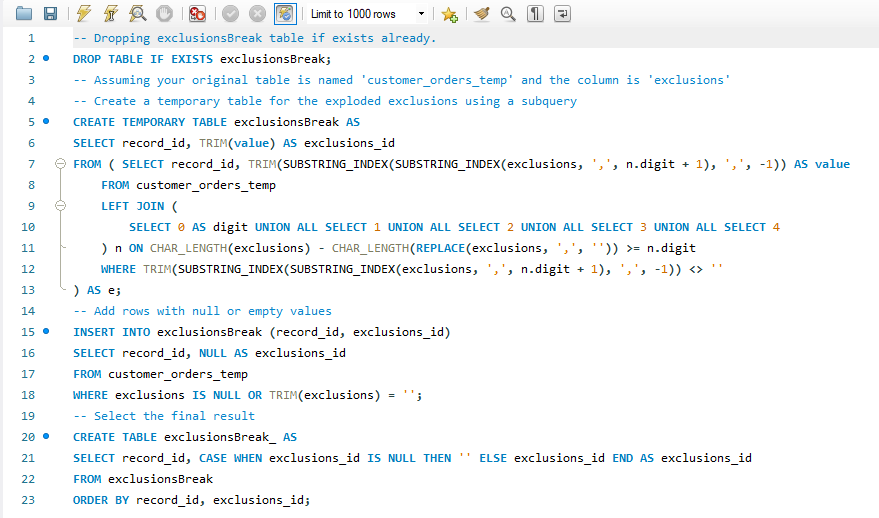

The output of the above query looks as follows:

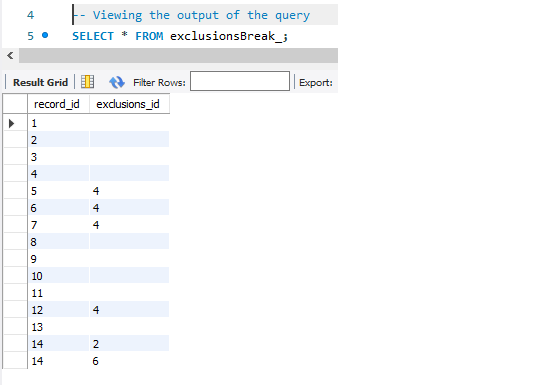

- **1) What are the standard ingredients for each pizza?**

**`Explanation`**:

***The query aims to retrieve the standard ingredients for each pizza by joining the `pizza_names`, `pizza_recipes_temp`, and `pizza_toppings` tables.***

**1) SELECT Statement:**
    
    - SELECT 
        pizza_names.pizza_id,
        pizza_names.pizza_name,
        -- Uses the GROUP_CONCAT function to concatenate distinct topping names into a comma-separated list for each pizza.
        GROUP_CONCAT(DISTINCT topping_name) AS topping_name_

**2) JOIN Conditions:**

    - JOIN pizza_recipes_temp ON pizza_names.pizza_id = pizza_recipes_temp.pizza_id
    - JOIN pizza_toppings ON pizza_recipes_temp.topping_id = pizza_toppings.topping_id

Here, we're joining the `pizza_names` table with the temporary table on the pizza ID and temporary table with the pizza_toppings table on the topping ID.

**`Final Concise Explanation`**:
The final result is a list of pizzas with their respective standard ingredients (topping names) presented as a comma-separated list. The query aggregates the toppings for each pizza, providing an overview of the standard ingredients for all pizzas in the dataset.

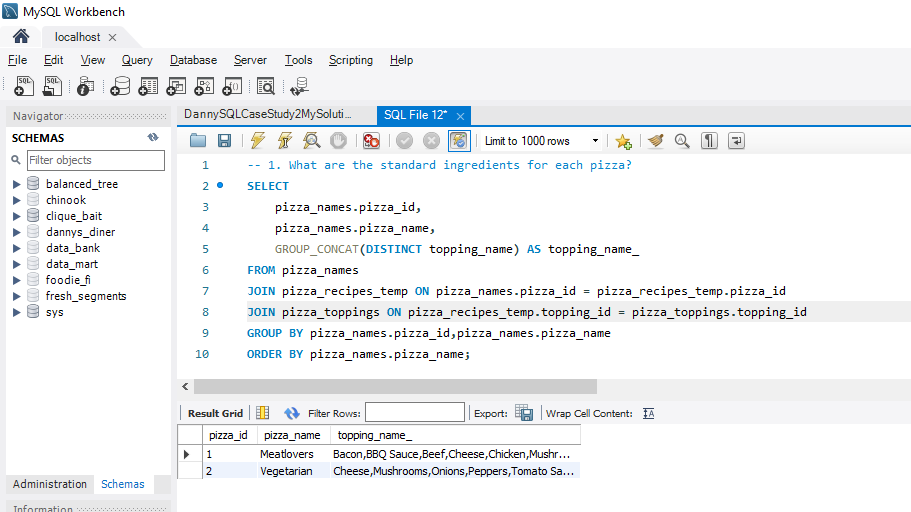

- **2. What was the most commonly added extra?**

**`Explanation`**:

***This query aims to identify the most commonly added extra topping to pizza orders. ***

**1) Common Table Expression (CTE):**
    
    - WITH cte AS (
    SELECT
        order_id,
        CAST(TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(extras, ',', n), ',', -1)) AS UNSIGNED) AS topping_id
    FROM
        customer_orders
    JOIN (
        SELECT 1 AS n
        UNION SELECT 2
        -- Add more numbers if needed
    ) AS numbers ON CHAR_LENGTH(extras) - CHAR_LENGTH(REPLACE(extras, ',', '')) >= n - 1
    WHERE extras IS NOT NULL)
    
A CTE named `cte` is defined to extract individual topping IDs from the `extras` column in the `customer_orders` table. It uses the `SUBSTRING_INDEX` function to split the `extras` string, and `TRIM` is used to remove leading or trailing spaces.

**2) Main Query:**

    - SELECT topping_name, COUNT(order_id) AS most_common_extras
      FROM cte
      JOIN pizza_toppings ON pizza_toppings.topping_id = cte.topping_id
      GROUP BY topping_name
      LIMIT 1;

The main query selects the `topping_name` and counts the occurrences of each extra topping using the CTE `cte`. It joins the CTE with the `pizza_toppings` table to retrieve the names of the extra toppings. The results are grouped by `topping_name`, and `COUNT(order_id)` calculates the number of orders containing each extra topping. Finally, `LIMIT 1` is applied to get only the most common extra topping.

**`Final Concise Explanation`**:
The overall purpose of the query is to find and report the most commonly added extra topping to pizza orders based on the available dataset.

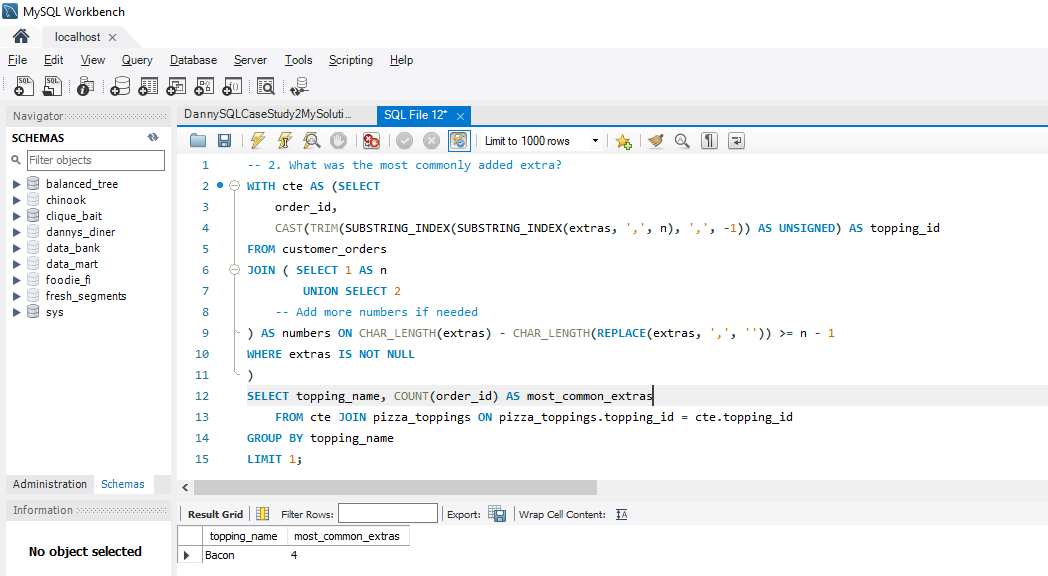

- **3. What was the most common exclusion?**

**`Explanation`**:

***This query aims to identify the most common exclusion (topping omitted) from pizza orders.***

**1) Common Table Expression (CTE):**
    
    - WITH cte AS (
    SELECT
        order_id,
        CAST(TRIM(SUBSTRING_INDEX(SUBSTRING_INDEX(exclusions, ',', n), ',', -1)) AS UNSIGNED) AS topping_id
    FROM
        customer_orders
    JOIN (
        SELECT 1 AS n
        UNION SELECT 2
        -- Add more numbers if needed
    ) AS numbers ON CHAR_LENGTH(exclusions) - CHAR_LENGTH(REPLACE(exclusions, ',', '')) >= n - 1
    WHERE exclusions IS NOT NULL)
    
A CTE named `cte` is defined to extract individual topping IDs from the `exclusions` column in the `customer_orders` table. It uses the `SUBSTRING_INDEX` function to split the `exclusions` string, and `TRIM` is used to remove leading or trailing spaces.

**2) Main Query:**

    - SELECT topping_name, COUNT(order_id) AS most_common_exclusions
      FROM cte
      JOIN pizza_toppings ON pizza_toppings.topping_id = cte.topping_id
      GROUP BY topping_name
      LIMIT 1;

The main query selects the `topping_name` and counts the occurrences of each exclusion topping using the CTE `cte`. It joins the CTE with the `pizza_toppings` table to retrieve the names of the exclusion toppings. The results are grouped by `topping_name`, and `COUNT(order_id)` calculates the number of orders excluding each topping. Finally, `LIMIT 1` is applied to get only the most common exclusion topping.

**`Final Concise Explanation`**:
The overall purpose of the query is to find and report the most commonly excluded topping from pizza orders based on the available dataset.

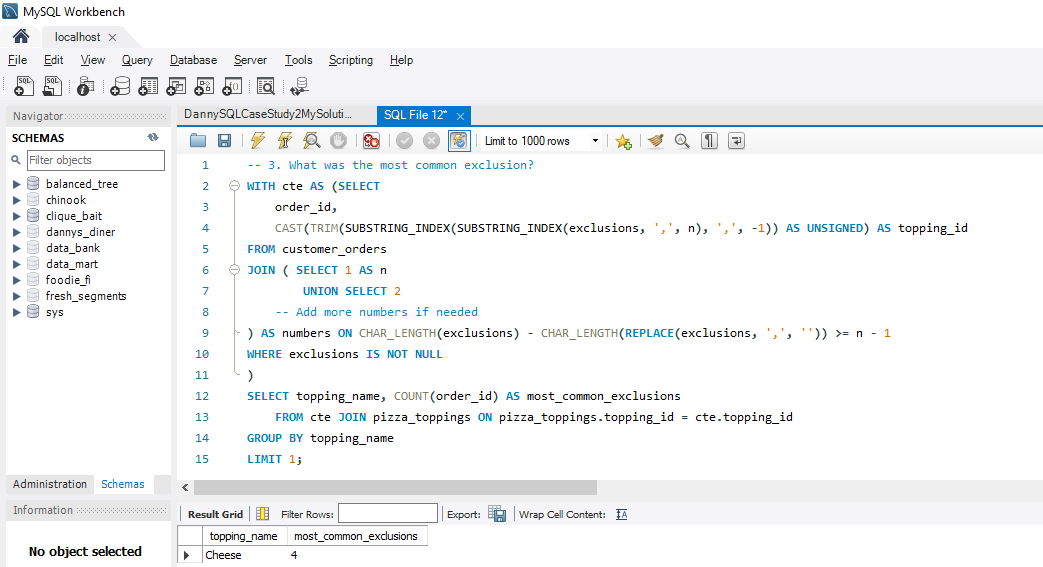

- **4. Generate an order item for each record in the customers_orders table in the format of one of the following:**
    - **`Meat Lovers`**
    - **`Meat Lovers - Exclude Beef`**
    - **`Meat Lovers - Extra Bacon`**
    - **`Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers`**
    
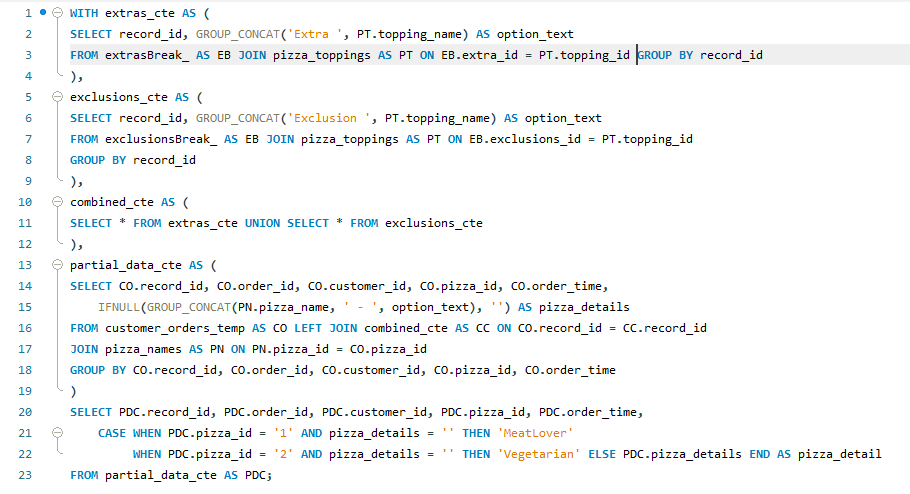

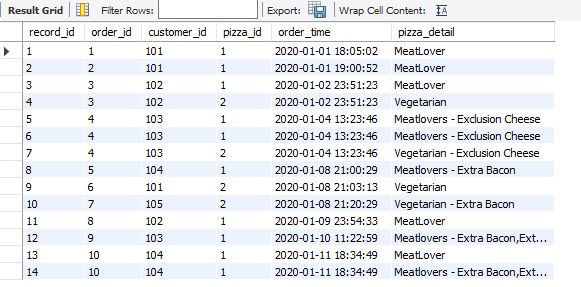

- **5. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the customer_orders table and add a 2x in front of any relevant ingredients
    For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"**
    
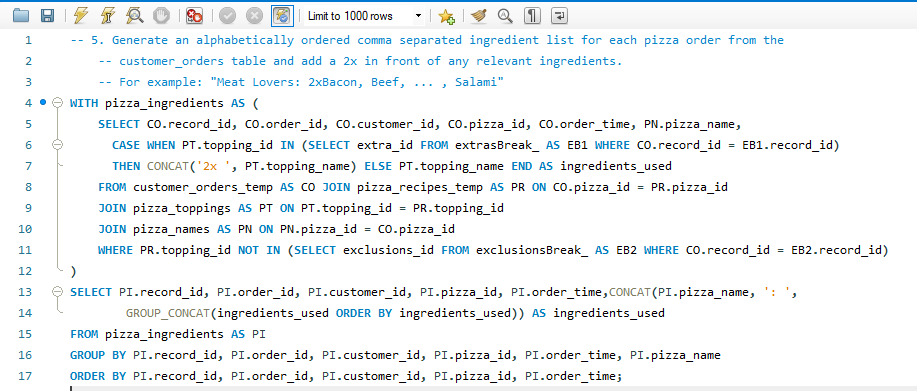

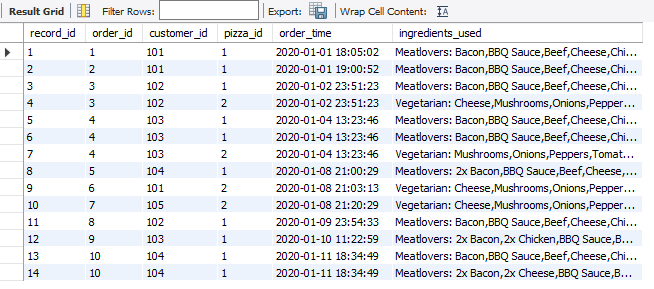

- **6. What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?**

**`Explanation`**:
***This SQL query calculates the total quantity of each pizza topping ingredient used in all delivered pizzas, sorting the results by the most frequently used toppings. Here's a step-by-step explanation:***

**1) Creation of Temporary Table (Common Table Expression - CTE):**
    
    - WITH pizza_ingredients AS (...): Defines a CTE named pizza_ingredients to gather information about each pizza order and categorize toppings based on whether they are regular, extra, or excluded.
    - Subquery inside CTE:
        - SELECT CO.order_id, CO.customer_id, PT.topping_name,
          CASE WHEN PR.topping_id IN 
              (SELECT extra_id FROM extrasBreak_ AS EB1 WHERE CO.record_id = EB1.record_id) THEN 2
          WHEN PR.topping_id IN 
              (SELECT exclusions_id FROM exclusionsBreak_ AS EB2 WHERE CO.record_id = EB2.record_id) THEN 0
          ELSE 1 END AS ingredients_used: Assigns a value (2 for extra, 0 for excluded, and 1 for regular) to each topping           based on its category in the pizza order.
        - FROM customer_orders_temp AS CO JOIN pizza_recipes_temp AS PR
          ON CO.pizza_id = PR.pizza_id JOIN pizza_toppings AS PT
          ON PT.topping_id = PR.topping_id
        
**2) Main Query:**

    - SELECT PI.topping_name, SUM(ingredients_used) AS qty_used_of_each_ingredients FROM pizza_ingredients AS PI: Counts the total quantity of each topping ingredient by summing the assigned values (2, 0, 1) based on their categories.
    - GROUP BY PI.topping_name: Groups the results by topping_name to aggregate the counts for each topping.
    - ORDER BY PI.topping_name: Orders the results alphabetically by topping_name.

**`Final Concise Explanation`**:
The query analyzes the pizza orders to determine the total quantity of each topping ingredient used. Toppings are categorized as regular, extra, or excluded, and the results are presented in descending order based on the most frequently used toppings. This information provides insights into the popularity of different toppings in delivered pizzas.

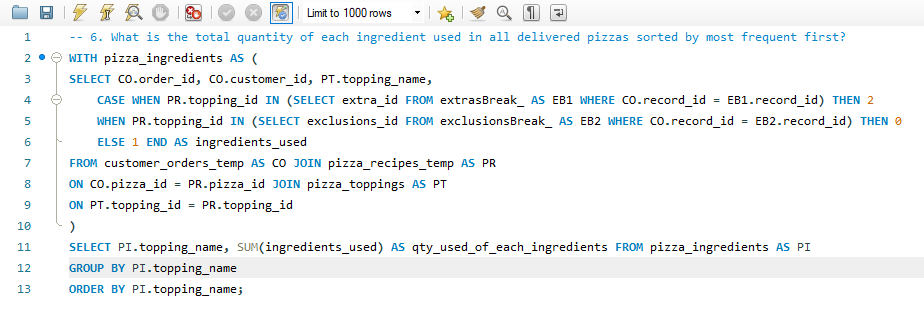

The output of the query is as follows:

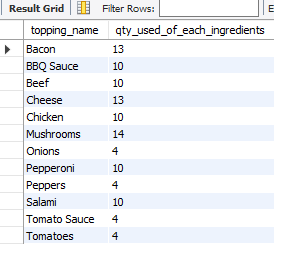

### D. Pricing and Ratings

- **1. If a Meat Lovers pizza costs \\$12 and Vegetarian costs \\$10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?**

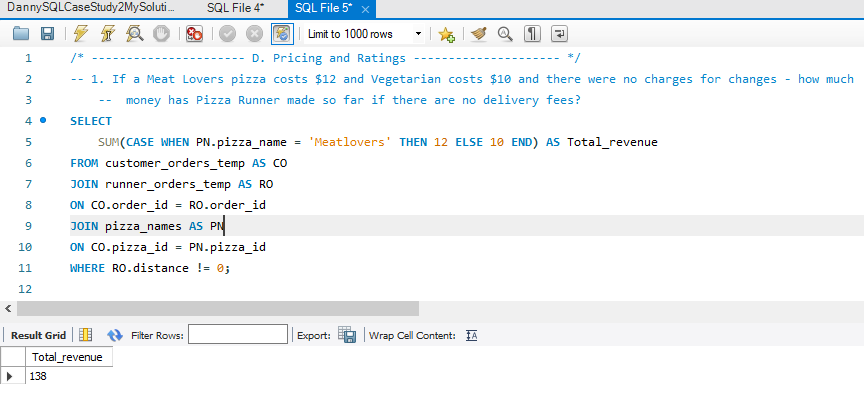

- **2. What if there was an additional \\$1 charge for any pizza extras?**
    - **Add cheese is \\$1 extra**
    
- 12 and 10 are the cost of Meat Lovers and Vegetarian pizzas respectively. 
- (CASE WHEN extras LIKE '%4%' THEN 2 ELSE 1 END) represents all the orders where 'cheese' (extras that contains 4) is present.  

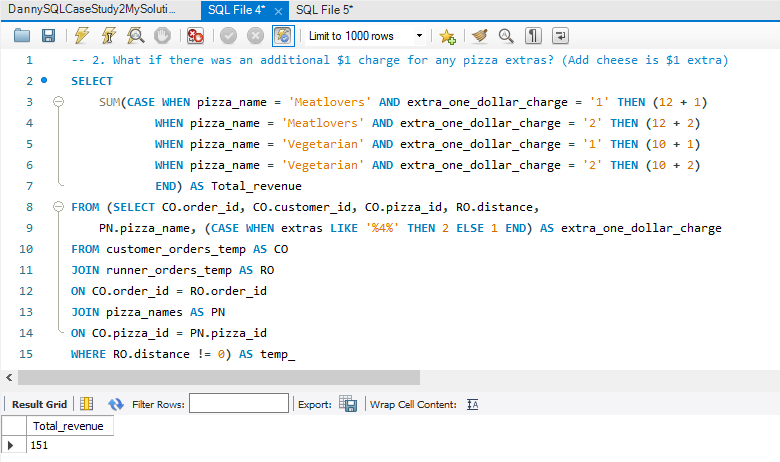

- **3. The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.**

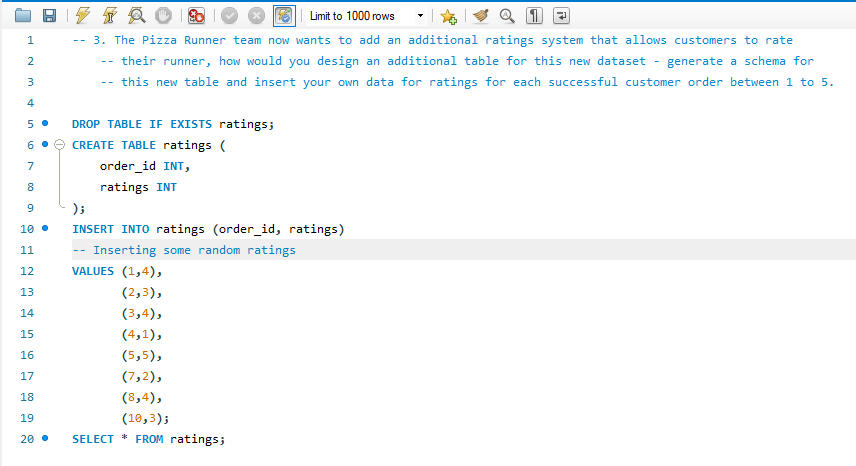

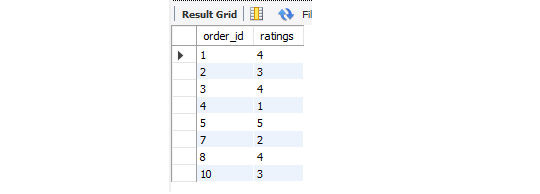

- **4. Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?**
    
    - `customer_id`
    - `order_id`
    - `runner_id`
    - `rating`
    - `order_time`
    - `pickup_time`
    - `Time between order and pickup`
    - `Delivery duration`
    - `Average speed`
    - `Total number of pizzas`
    
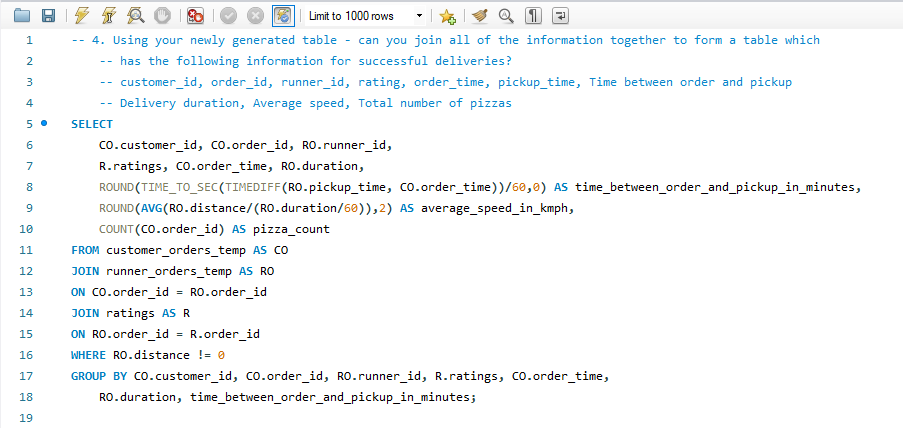

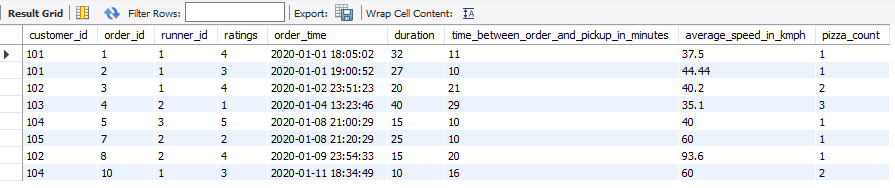

- **5. If a Meat Lovers pizza was \\$12 and Vegetarian \\$10 fixed prices with no cost for extras and each runner is paid \\$0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?**

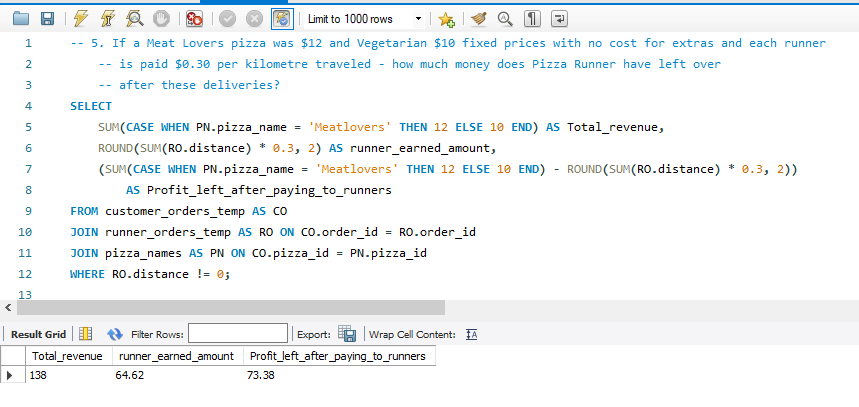

### E. Bonus Questions

If Danny wants to expand his range of pizzas - how would this impact the existing data design? Write an **`INSERT`** statement to demonstrate what would happen if a new **`Supreme`** pizza with all the toppings was added to the Pizza Runner menu?

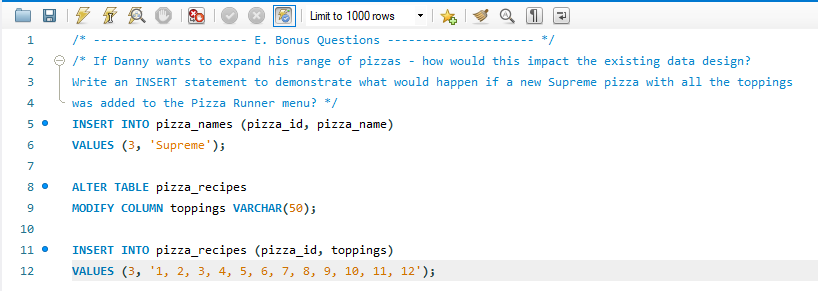

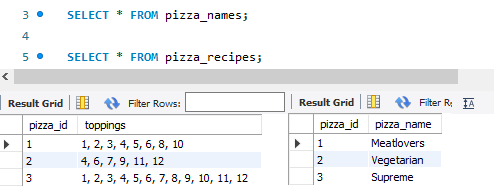